**(c)** 2024 by *Sebastian Bader*

[Mobile Multimedia Information Systems](https://www.mmis.informatik.uni-rostock.de/), 
[Institute for Visual and Analytic Computing](https://vac.uni-rostock.de/)

A Jupyter Notebook as part of the lecture<br/>
***AI7 - Reasoning under Uncertainty***

---

The excercises are structured as follows: 

You will find numbered tasks below, similar to:
#### E1) Give your answer in the following cell!

The following cell can be either a `Code`-cell (look in the toolbar above once the cell is selected, also indicated by the `In []` left to the cell. 
In case of a code-cell, you will have to implement the answer!

Alternatively it can be a `raw NBConvert` cell. In this case, I expect a written (natural language) answer, like: 

---- 

# Tutorial 1 - Basic Probabilities in Python

But now let's start with the real concent ...

... by first importing some useful packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A simple discrete experiment

#### E1) Implement the function `dice`!
Define a function `dice`, which returns for a given number `n` of dice-throws an numpy array of shape `(n,)`!

In [ ]:
def dice(n):
    # TODO: implement the function
    return ...

print("This is the result of 5 dice throws:", dice(5))

After taking 1000 samples, we would like to know how the different outcomes `1...6` are distributed. 
The simplest way for a visual inspection is to draw a histogram which contains the number of occurences for each of the six outcomes. Such diagrams can be created using https://matplotlib.org

#### E2) Create a histogram plot similar to the following:
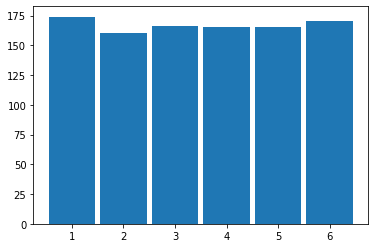

In [ ]:
ds = dice(1000)

# TODO draw a histogram using matplotlib 
...

plt.show()

#### E3) What is the average of all outcomes?

A numerical way to characterize a distribution over ordered numerical values, is to compute minimal, maximal and average value of the 1000 outcomes. Please describe what values you expect for minimum, maximum and average!

#### E4) Now, compute the minimum, maximum and average of all outcomes!

In [ ]:
average = ...  # TODO implement
minimum = ...  # TODO implement
maximum = ...  # TODO implement

print(f"The average of the {len(ds)} dice throws is {average}, (minimum={minimum}, maximum={maximum})")

#### E5) Lets repeat it again and again!

Repeat the above experiment 10000 times. I.e., for each experiment, throw 1000 dices, compute the average and store all those averages in a variable called `means`!

In [ ]:
means = [ ... ] # TODO: implement

assert len(means) == 10000

#### E6) What do you expect a histogramm of all those means to look like and why? 

#### E7) Plot the histogramm using the following command:

In [ ]:
plt.hist(means, bins=21, rwidth=0.9)
plt.show()

---- 

# A continuous experiment

After looking into a simple discrete distribution, let's move to two important continuous ones ...

## Uniform distributions

#### E8) Fill the numpy-array `xy` of shape `(100,2)` with uniform floats between `0` and `1`!

Check the numpy-documentation at https://numpy.org/doc/stable/reference/random/

In [ ]:
# TODO implement
xy = ...

# now let's plot it - the dots should be uniformly distributed within the unit-square
plt.scatter(xy[:,0], xy[:,1], marker='.')
plt.gcf().set_size_inches(5,5)
plt.show()

`pandas`-dataframes offer simple access to some statistical features.
Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
Let's convert the numpy array into a dataframe and look at its description.

In [ ]:
# convert the array into a dataframe with named columns
df=pd.DataFrame(xy, columns=['x', 'y'])

df.describe()

Now we will add another column to our dataframe called `c` and defined as follows:

In [ ]:
df['c'] = 1.0 * (df.x**2 + df.y**2 < 1)

We will now plot it again and use the column `c` as color:

In [ ]:
plt.scatter(df.x, df.y, c=df.c, marker='.', cmap='Paired')
plt.gcf().set_size_inches(5,5)
plt.show()

#### E9) What value do you expect for the average of column `c`? 
Hint: you can give a really very precise estimate for it! 
Give your estimate in the following code-cell as `c_average_estimate` and describe your idea afterwards!

In [ ]:
# TODO Specify your estimate!
c_average_estimate = ...

#### E10) Compute the mean of column `c`! 
Compute the average using a function of the numpy package!

In [ ]:
# TODO implement
c_average = ...

print(c_average)

Now let's check if you guess was a good one - i.e. within an $\epsilon = 0.1$ neighbourhood.

In [ ]:
if np.isclose(c_average_estimate, c_average, atol=0.1):
    print(f"Your guess of {c_average_estimate} is a good guess for {c_average}!")
else:    
    print(f"Your guess of {c_average_estimate} is NOT a good guess for {c_average}!")


---

# Density functions and Samping

A general interface for probability functions should contain the following two functions:

- `pdf(x)`: returns the probability for a given value `x`
- `sample()`: returns a sample from the probability distribution

This is captured within the following class:

In [ ]:
class PD(object):
    def pdf(self, x):
        raise NotImplementedError(f"PDF is not implemented for {self}")

    def sample(self):
        raise NotImplementedError(f"sampling is not implemented for {self}")

    def samples(self, n):
        return [ self.sample()  for i in range(n) ]


#### E11) Implement a simple discrete distribution over a given set of elements.

Please implement the sampling using a simple random number generator only. E.g., by using the function `np.random.rand()` which will create a random number within `[0, 1)`.

In [ ]:
np.random.rand()

In [ ]:
class DiscreteUniform(PD):
    def __init__(self, *elements):
        self.elements = elements

    def pdf(self, x):
        # TODO: implement
        raise NotImplementedError(f"PDF is not implemented for {self}")

    def sample(self):
        # TODO: implement
        raise NotImplementedError(f"sampling is not implemented for {self}")

Using this we can instantiate a dice as a discrete distribution over the 6 values:

In [ ]:
dice = DiscreteUniform(1,2,3,4,5,6)

And sample 10 values:

In [ ]:
print(dice.samples(10))

compute the probability of the value `1`:

In [ ]:
print('P(1) =', dice.pdf(1))

compute the probability of an illegal value `42`:

In [ ]:
print('P(42) =', dice.pdf(42))

#### E12) Implement a 1-dimensional normal distribution for a given mu and sigma

Please check the following page for details: https://en.wikipedia.org/wiki/Normal_distribution

Use the https://en.wikipedia.org/wiki/Box–Muller_transform to sample new normal data points based on the function `np.random.rand()`!

In [ ]:
class NormalDistribution1D(PD):
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def __str__(self):
        return "$\mathcal{N}(\mu={%s}, \sigma=%s)$" % (self.mu, self.sigma)
        
    def pdf(self, x):
        # TODO: implement
        #raise NotImplementedError(f"PDF is not implemented for {self}")

    def sample(self):
        # TODO: implement
        raise NotImplementedError(f"sampling is not implemented for {self}")

Now, we can use it to plot a Gaussian bell curve:

In [ ]:
mu = 3
sigma = 1

gd = NormalDistribution1D(mu, sigma)
xs = np.linspace(mu-3*sigma, mu+3*sigma, 100)
ys = [ gd.pdf(x)  for x in xs   ]

plt.plot(xs, ys)
plt.axvline(mu)
plt.axvline(mu-sigma, ls=':')
plt.axvline(mu+sigma, ls=':')
plt.title("PDF for %s" % gd)
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

---- 
# Final Questions


#### FQ1. How long did it take you to complete the notebook?

#### FQ2. What do you expect from the lecture AI7 Reasoning under Uncertainty?

#### FQ3. What was the biggest problem in this tutorial?

#### FQ4. Do you plan to do the exam in AI7 as part of your Complex exam? 
Simply remove the lines which are not correct for you!

#### Further comments